Coeficiente a2: 2.0244104829250835
Coeficiente a1: -1.123325129575543
Coeficiente a0: -0.6382556172537744


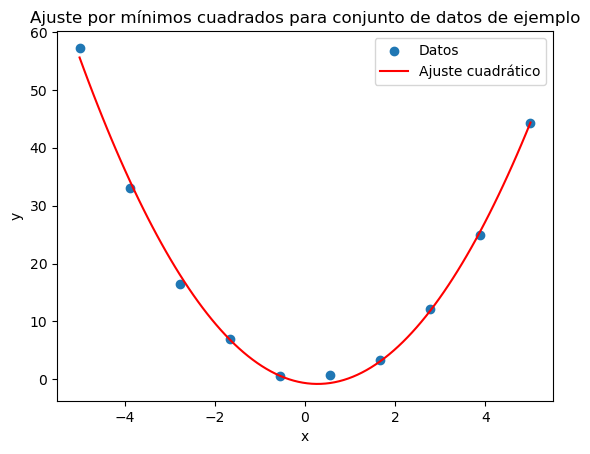

y(2.25) = 7.082840911009489
y(-2.25) = 12.137803994099434


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Conjunto de datos 1
xs1 = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys1 = [
    57.2441,
    33.0303,
    16.4817,
    7.0299,
    0.5498,
    0.7117,
    3.4185,
    12.1767,
    24.9167,
    44.2495,
]

# Derivadas parciales para regresión cuadrática
def der_parcial_2(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(xi**2 for xi in xs)
    c_1 = sum(xs)
    c_0 = len(xs)
    c_ind = sum(yi for yi in ys)
    return (c_2, c_1, c_0, c_ind)

def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(xi**3 for xi in xs)
    c_1 = sum(xi**2 for xi in xs)
    c_0 = sum(xs)
    c_ind = sum(xi * yi for xi, yi in zip(xs, ys))
    return (c_2, c_1, c_0, c_ind)

def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(xi**4 for xi in xs)
    c_1 = sum(xi**3 for xi in xs)
    c_0 = sum(xi**2 for xi in xs)
    c_ind = sum(xi**2 * yi for xi, yi in zip(xs, ys))
    return (c_2, c_1, c_0, c_ind)

def ajustar_min_cuadrados(xs: list, ys: list, gradiente: list) -> tuple[float, float, float]:
    A = []
    B = []
    for der in gradiente:
        c_2, c_1, c_0, c_ind = der(xs, ys)
        A.append([c_2, c_1, c_0])
        B.append(c_ind)
    coeffs = np.linalg.solve(A, B)
    return coeffs

# Ajustar una función cuadrática
a2, a1, a0 = ajustar_min_cuadrados(xs1, ys1, gradiente=[der_parcial_0, der_parcial_1, der_parcial_2])

# Mostrar los resultados
print(f"Coeficiente a2: {a2}")
print(f"Coeficiente a1: {a1}")
print(f"Coeficiente a0: {a0}")

# Graficar los datos y la curva de ajuste cuadrático
plt.scatter(xs1, ys1, label="Datos")
x_line = np.linspace(min(xs1), max(xs1), 100)
y_line = a2 * x_line**2 + a1 * x_line + a0
plt.plot(x_line, y_line, color='red', label="Ajuste cuadrático")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados para conjunto de datos de ejemplo")
plt.legend()
plt.show()

# Calcular y(2.25)
x_value_1 = 2.25
y_value_1 = a2 * x_value_1**2 + a1 * x_value_1 + a0
print(f"y(2.25) = {y_value_1}")

# Calcular y(-2.25)
x_value_2 = -2.25
y_value_2 = a2 * x_value_2**2 + a1 * x_value_2 + a0
print(f"y(-2.25) = {y_value_2}")

Coeficiente a: 0.5440855388147079
Coeficiente b: 1.4171603667055417
y(5) = 650.117443911165
y(1) = 2.24456460537595


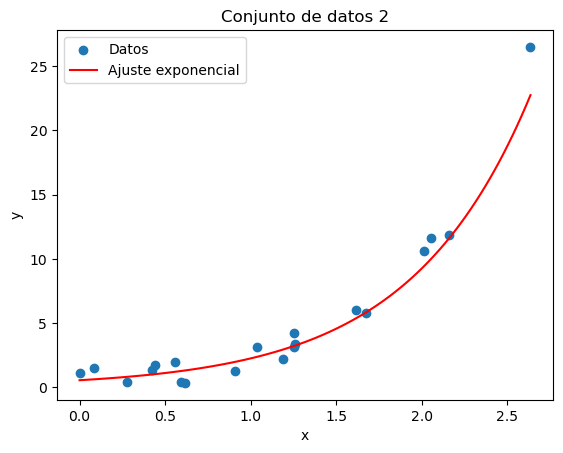

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Conjunto de datos 2
xs2 = [
    0.0003,
    0.0822,
    0.2770,
    0.4212,
    0.4403,
    0.5588,
    0.5943,
    0.6134,
    0.9070,
    1.0367,
    1.1903,
    1.2511,
    1.2519,
    1.2576,
    1.6165,
    1.6761,
    2.0114,
    2.0557,
    2.1610,
    2.6344,
]
ys2 = [
    1.1017,
    1.5021,
    0.3844,
    1.3251,
    1.7206,
    1.9453,
    0.3894,
    0.3328,
    1.2887,
    3.1239,
    2.1778,
    3.1078,
    4.1856,
    3.3640,
    6.0330,
    5.8088,
    10.5890,
    11.5865,
    11.8221,
    26.5077,
]

# Transformar ys2 usando logaritmo natural
log_ys2 = np.log(ys2)

# Ajustar una línea recta a los datos transformados
coeffs = np.polyfit(xs2, log_ys2, 1)
b, log_a = coeffs
a = np.exp(log_a)

# Mostrar los resultados
print(f"Coeficiente a: {a}")
print(f"Coeficiente b: {b}")

# Calcular y(5) y y(1)
y_5 = a * np.exp(b * 5)
y_1 = a * np.exp(b * 1)

print(f"y(5) = {y_5}")
print(f"y(1) = {y_1}")

# Graficar los datos y la curva de ajuste exponencial
plt.scatter(xs2, ys2, label="Datos")
x_line = np.linspace(min(xs2), max(xs2), 100)
y_line = a * np.exp(b * x_line)
plt.plot(x_line, y_line, color='red', label="Ajuste exponencial")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 2")
plt.legend()
plt.show()